# Analysis of sequential DNA-MERFISH for CTP07

by Pu Zheng

2022.05.30

analysis for dataset:

\\10.245.74.158\Chromatin_NAS_7\20220528-CTP07chr2_hSTG


In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

28424


# 0. fov parameters

In [11]:
reload(ia)
reload(classes)
reload(classes.batch_functions)
reload(classes.field_of_view)
reload(io_tools.load)
reload(get_img_info)
reload(visual_tools)
reload(ia.correction_tools)
reload(ia.correction_tools.alignment)
reload(ia.spot_tools.matching)
reload(ia.segmentation_tools.chromosome)
reload(ia.spot_tools.fitting)

fov_param = {'data_folder':r'\\10.245.74.158\Chromatin_NAS_7\20220528-CTP07chr2_hSTG',
             'save_folder':r'\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\20220528-CTP07chr2_hSTG',
             'experiment_type': 'DNA',
             'num_threads': 16,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210621-Corrections_lumencor_from_60_to_50',
             'shared_parameters':{
                     'single_im_size':[50,2048,2048],
                     'distance_zxy': [250, 108, 108],
                     'corr_channels':['750','647','561'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'corr_bleed':True,
                     'min_num_seeds':5,
                     'max_num_seeds': 20000,
                     'spot_seeding_th': 1000,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                     'corr_gaussian_highpass':False,
                 }, 
             }

# 1. Process Fov

In [12]:
folders, fovs = ia.io_tools.data.get_folders(fov_param['data_folder'])

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 15
- Number of field of views: 129


In [13]:
sel_rids = [16,21,26,
31,36,41,
46,51,56,
61,66,71,
76,81,86,
91,96,101,
106,111,116,
121,126,131,
136,141,146,
151,156,161,
166,171,176,
181,186,191,
196,201,206]


In [14]:
_overwrite = False
_save_images = True
_fit_spots = True
_warp_images = False

for _fov_id, _fov_name in enumerate(fovs):
    
    fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                              _color_info_kwargs={
                                                  '_color_filename':'Color_Usage',
                                              }, 
                                              _prioritize_saved_attrs=False,
                                              _save_info_to_file=False, # whether overwrite
                                              )
    break
    # 2. Process image into candidate spots
    fov.parallel = True
    fov.unique_ref_id = 0
    fov._process_image_to_spots('unique', 
                                _sel_ids=sel_rids,
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=_save_images,
                                _warp_images=_warp_images, 
                                _fit_spots=_fit_spots,
                                _overwrite_drift=False, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite,
                                _verbose=True)
    # 3. Process DAPI image
    fov._load_dapi_image()

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 15
- Number of field of views: 129
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_7\20220528-CTP07chr2_hSTG\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
dict_keys(['H0U1', 'H1U2', 'H2U3', 'H3U4', 'H4U5', 'H5U6', 'H6U7', 'H7U8', 'H8U9', 'H9U10', 'H10U11', 'H11U12', 'H12U13', 'H13U14', 'H14U15'])
- 15 folders are found according to color-usage annotation.
+ loading fov_info from file: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\20220528-CTP07chr2_hSTG\Conv_zscan_000.hdf5
++ base attributes loaded:['chrom_im', 'dapi_im', 'unique_ref_im'] in 6.156s.
+ loading correction from file: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\20220528-CTP07chr2_hSTG\Conv_zscan_000.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load i

In [15]:
fov._load_from_file('unique')

+ loading unique from file: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\20220528-CTP07chr2_hSTG\Conv_zscan_000.hdf5
++ finish loading unique in 0.130s. 


In [19]:
# load images
with h5py.File(fov.save_filename, 'r') as _f:
    unique_ims = _f['unique/ims'][:]
    

array([  1,   6,  11,  16,  21,  26,  31,  36,  41,  46,  51,  56,  61,
        66,  71,  76,  81,  86,  91,  96, 101, 106, 111, 116, 121, 126,
       131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191,
       196, 201, 206])

<IPython.core.display.Javascript object>


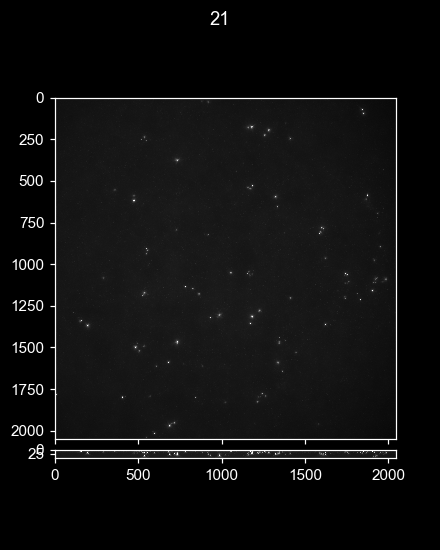

In [35]:
plt.style.use('dark_background')
visual_tools.imshow_mark_3d_v2(unique_ims, min_max_default=[1000,15000], image_names=fov.unique_ids)